CIFAR-10 has 10 different classes so the name.
We have to classify these images.
Data has very low resolution of data. It is only 32x32.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [4]:
(x_train, y_train) , (X_test, Y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
Y_test.shape

(10000, 1)

# To Visualize data -

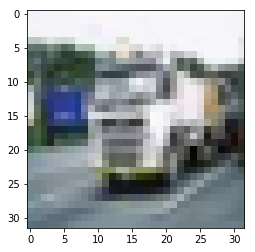

In [9]:
plt.imshow(x_train[1000])

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


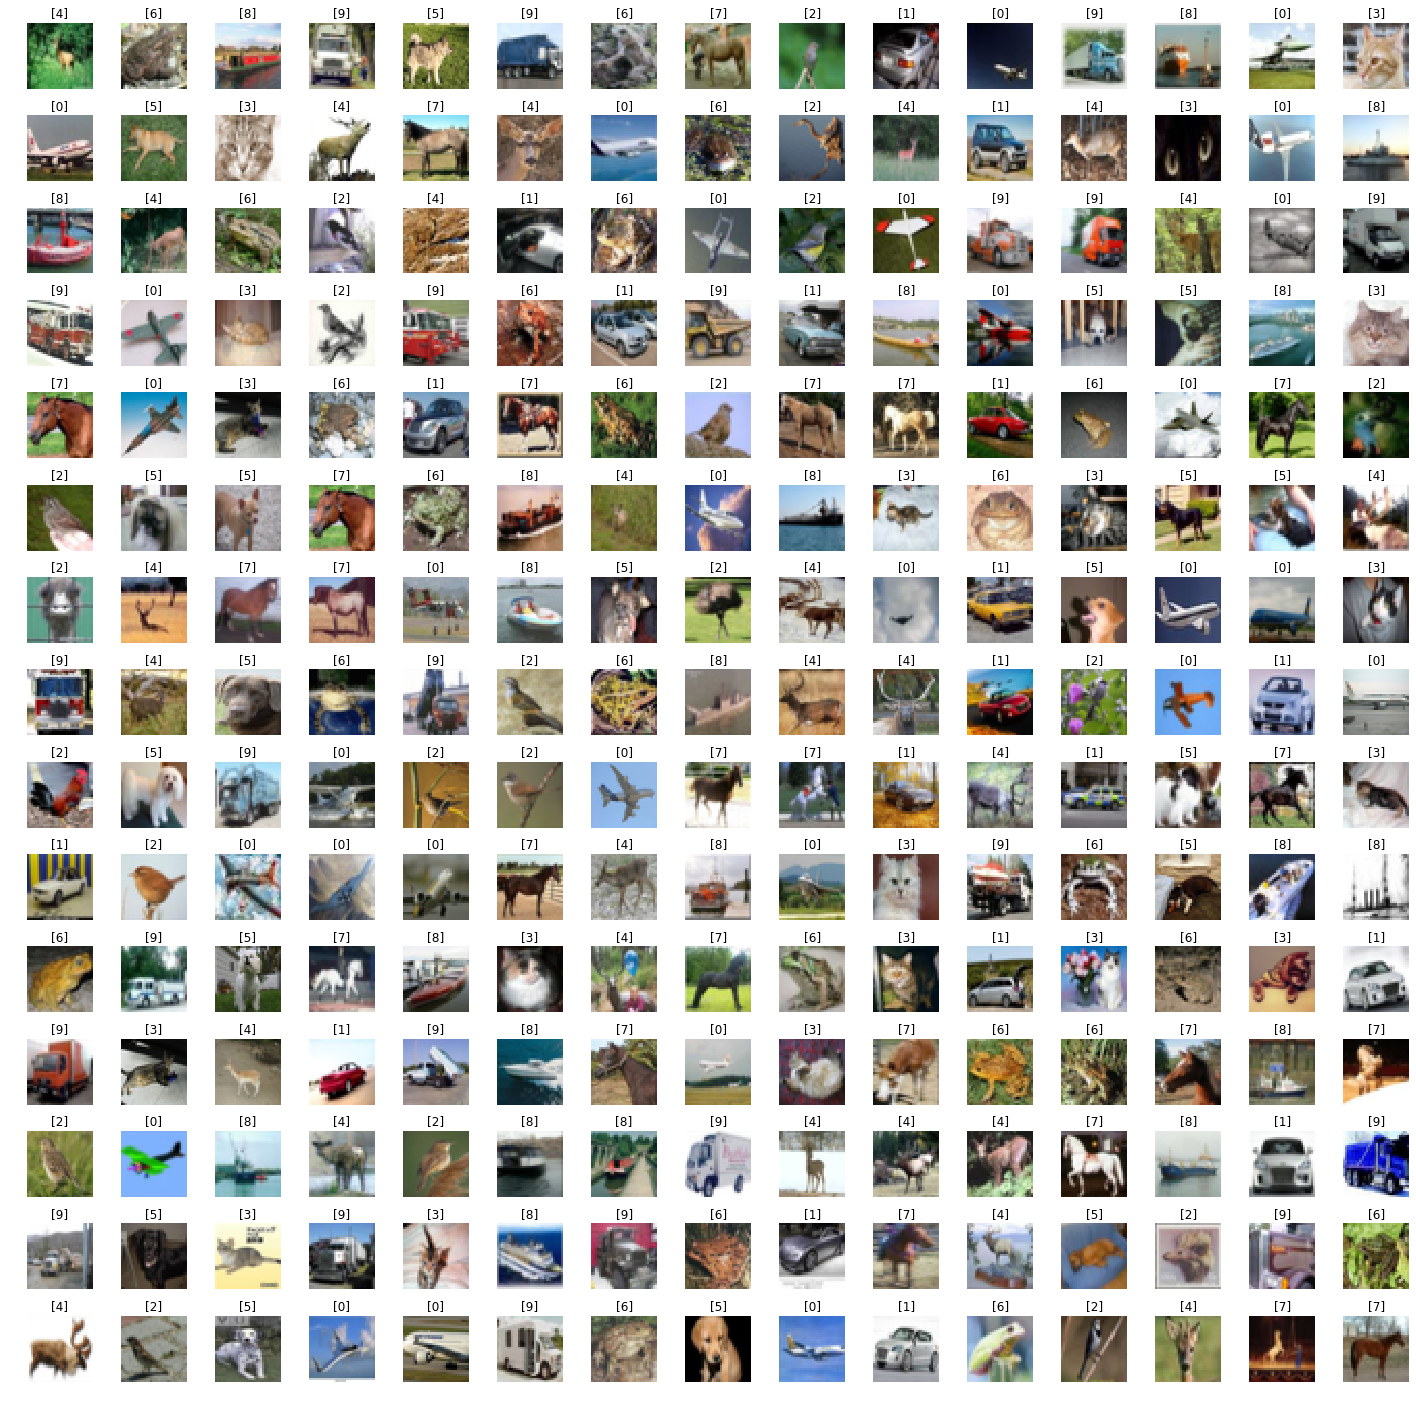

In [10]:
Wgrid = 15
Lgrid = 15

fig, axes = plt.subplots(Lgrid, Wgrid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(x_train)


# learn to make beautiful collage

for i in np.arange(0, Lgrid*Wgrid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off') # turn off the axes
    
plt.subplots_adjust(hspace = 0.4)

# Data Wrangling

In [11]:
X_train = x_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
number_cat = 10

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
import keras
Y_train = keras.utils.to_categorical(y_train, number_cat)

In [15]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
Y_test = keras.utils.to_categorical(Y_test, number_cat)

In [17]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
X_train = X_train/255
X_test = X_test/255 # normalization

In [19]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [20]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

# Building and Training Model

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
# Conv2d - convulation
# maxpooling and average pooling will be used for pooling
# Dense - to create fully connected ann
# flatten - to flatten feature maps to simple array
# dropout - to drop some neurons (regularization/treat overfit)
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [27]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))


cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [41]:
from keras import metrics
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics=[metrics.mae, metrics.categorical_accuracy])

In [42]:
history = cnn_model.fit(X_train, Y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
50000/50000 [==============================] - 173s 3ms/step - loss: 1.0055 - mean_absolute_error: 0.0895 - categorical_accuracy: 0.6579
Epoch 2/2
50000/50000 [==============================] - 171s 3ms/step - loss: 0.9527 - mean_absolute_error: 0.0844 - categorical_accuracy: 0.6761


# Model Evauation

In [44]:
evaluation = cnn_model.evaluate(X_test, Y_test)
# evaluation[1]

print(cnn_model.metrics_names)
print(evaluation)

10000/10000 [==============================] - 7s 698us/step
['loss', 'mean_absolute_error', 'categorical_accuracy']
[1.0537701566696167, 0.0942358743429184, 0.6479]


In [45]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([8, 8, 8, ..., 5, 4, 7], dtype=int64)

In [46]:
Y_test = Y_test.argmax(1)
Y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

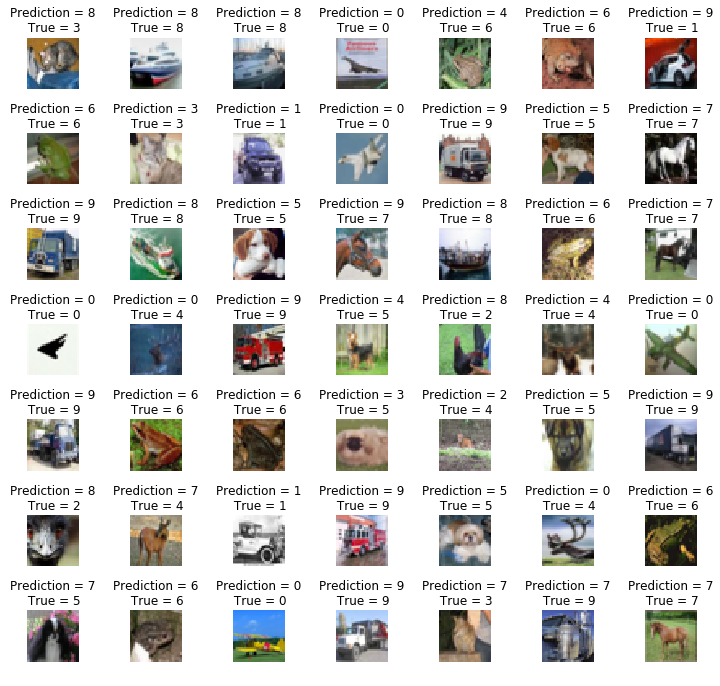

In [48]:
L = 7
W = 7
fig, axis = plt.subplots(L, W, figsize = (12, 12))
axis = axis.ravel()

for i in np.arange(0, L*W):
    axis[i].imshow(X_test[i])
    axis[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], Y_test[i]))
    axis[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

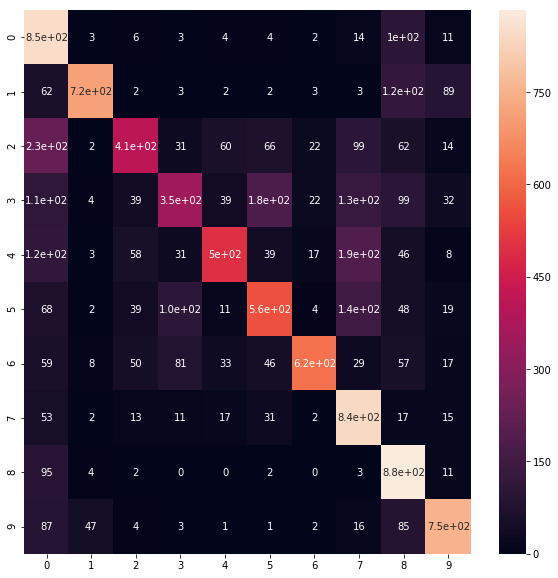

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, predicted_classes)

plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# Saving the model

In [53]:
import os
directory = os.path.join(os.getcwd(), 'save_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)